In [5]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from collections import Counter
import random
import requests
from bs4 import BeautifulSoup
from PIL import Image
import cv2

In [2]:
import requests
from bs4 import BeautifulSoup

# Replace 'your_url' with the actual URL of the web page you want to scrape
url = 'https://all-free-download.com/free-photos/yellow-rose.html'

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all img tags in the HTML
    img_tags = soup.find_all('img')

    # Extract the src attributes and store them in a list
    src_list = [img['src'] for img in img_tags if 'src' in img.attrs]

    # Filter out URLs with the ".svg" extension
    filtered_src_list = [src for src in src_list if not src.endswith('.svg')]

    # Print or use the filtered_src_list as needed
    print(filtered_src_list[:5])
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

['https://all-free-download.com/images/shutterstockbanner/728x90free10images.png', '/images/facebook_Logo.png', 'https://images.all-free-download.com/images/thumbjpg/yellow_rose_195131.jpg', 'https://images.all-free-download.com/images/thumbjpg/yellow_rose_195130.jpg', 'https://images.all-free-download.com/images/thumbjpg/yellow_rose_195124.jpg']


In [4]:
import requests
from bs4 import BeautifulSoup
import os

# Replace 'your_url' with the actual URL of the web page you want to scrape
url = 'https://all-free-download.com/free-photos/yellow-rose.html'

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all img tags in the HTML
    img_tags = soup.find_all('img')

    # Extract the src attributes and store unique values in a list
    src_list = list(set(img['src'] for img in img_tags if 'src' in img.attrs and not img['src'].endswith('.svg')))

    # Download the first 20 unique images
    for i, img_url in enumerate(src_list[:], 1):
        # Make a GET request to the image URL
        image_response = requests.get(img_url)

        # Check if the request was successful (status code 200)
        if image_response.status_code == 200:
            # Get the filename from the URL
            filename = f"rose_flower_{i}.jpg"

            # Specify the local folder where you want to save the image
            local_folder = r"C:\Users\madhu\OneDrive\Desktop\Capstone\Model\newdata\myflowers_dataset\yellow rose"

            # Combine the local folder path and filename
            local_path = os.path.join(local_folder, filename)

            # Save the image content to the local file
            with open(local_path, 'wb') as image_file:
                image_file.write(image_response.content)

            print(f"rose {i} downloaded and saved as {local_path}")
        else:
            print(f"Failed to download image {i}. Status code: {image_response.status_code}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

rose 1 downloaded and saved as C:\Users\madhu\OneDrive\Desktop\Capstone\Model\newdata\myflowers_dataset\yellow rose\rose_flower_1.jpg
rose 2 downloaded and saved as C:\Users\madhu\OneDrive\Desktop\Capstone\Model\newdata\myflowers_dataset\yellow rose\rose_flower_2.jpg


MissingSchema: Invalid URL '/images/facebook_Logo.png': No scheme supplied. Perhaps you meant https:///images/facebook_Logo.png?

## for Edge Browser

In [5]:
import requests
from bs4 import BeautifulSoup
import os

# Replace 'your_url' with the actual URL of the web page you want to scrape
url = 'https://www.bing.com/images/search?view=detailV2&ccid=dE%2fbarbw&id=BDED354388EF8AAAE3742B8DE4EF129F42652245&thid=OIP.dE_barbwNlUEXb2V2tWTJAHaFj&mediaurl=https%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f51%2fSmall_Red_Rose.JPG&exph=1704&expw=2272&q=red+rose&simid=608012793918611614&FORM=IRPRST&ck=A3865509DB1B7EF8A14CE0CC475F1F7B&selectedIndex=3&itb=0&ajaxhist=0&ajaxserp=0'

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all div tags with class "imgpt" (specific to Bing image search)
    img_divs = soup.find_all('div', class_='imgpt')

    # Extract the data-src attributes and store unique values in a list
    src_list = list(set(div.find('img')['data-src'] for div in img_divs if div.find('img') and 'data-src' in div.find('img').attrs))

    # Download the first 20 unique images
    for i, img_url in enumerate(src_list[:20], 1):  # Limit to the first 20 images
        # Make a GET request to the image URL
        image_response = requests.get(img_url)

        # Check if the request was successful (status code 200)
        if image_response.status_code == 200:
            # Get the filename from the URL
            filename = f"Hibiscus2_{i}.jpg"

            # Specify the local folder where you want to save the image
            local_folder = r"C:\Users\madhu\OneDrive\Desktop\Datasets\testingflowers\RedRose"

            # Combine the local folder path and filename
            local_path = os.path.join(local_folder, filename)

            # Save the image content to the local file
            with open(local_path, 'wb') as image_file:
                image_file.write(image_response.content)

            print(f"Hibiscus {i} downloaded and saved as {local_path}")
        else:
            print(f"Failed to download image {i}. Status code: {image_response.status_code}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

In [1]:
dataset_path = "./newdata\\myflowers_dataset"

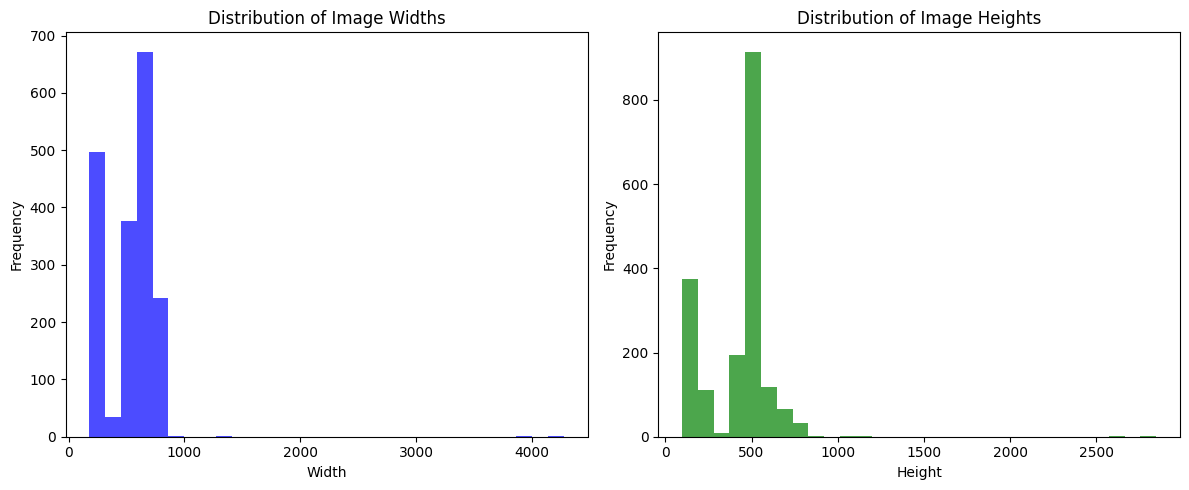

In [6]:
# Function to load and preprocess image
def analyze_image_dimensions(dataset_path):
    image_dimensions = []

    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                width, height = img.size
                image_dimensions.append((width, height))

    return image_dimensions

# Analyze image dimensions
image_dimensions = analyze_image_dimensions(dataset_path)

# Plot histograms of image dimensions
widths = [dim[0] for dim in image_dimensions]
heights = [dim[1] for dim in image_dimensions]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()

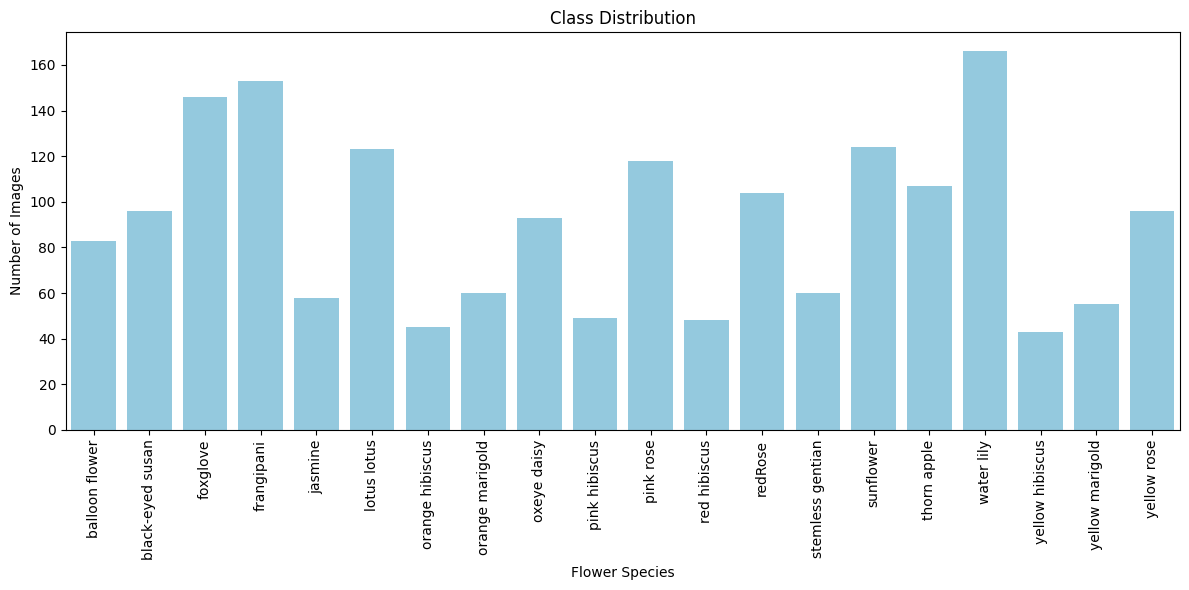

Class Distribution:
{'balloon flower': 83, 'black-eyed susan': 96, 'foxglove': 146, 'frangipani': 153, 'jasmine': 58, 'lotus lotus': 123, 'orange hibiscus': 45, 'orange marigold': 60, 'oxeye daisy': 93, 'pink hibiscus': 49, 'pink rose': 118, 'red hibiscus': 48, 'redRose': 104, 'stemless gentian': 60, 'sunflower': 124, 'thorn apple': 107, 'water lily': 166, 'yellow hibiscus': 43, 'yellow marigold': 55, 'yellow rose': 96}


In [7]:
# Function to calculate class distribution
def calculate_class_distribution(dataset_path):
    class_labels = []
    
    # Iterate through each class directory
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        
        # Count the number of images in each class
        num_images = len(os.listdir(class_dir))
        
        # Store the class name and count in the list
        class_labels.append((class_name, num_images))
    
    # Convert the list to a dictionary for easy plotting
    class_distribution = dict(class_labels)
    
    return class_distribution

# Calculate class distribution
class_distribution = calculate_class_distribution(dataset_path)

# Plot bar chart of class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), color='skyblue')
plt.xlabel('Flower Species')
plt.ylabel('Number of Images')
plt.title('Class Distribution')

plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

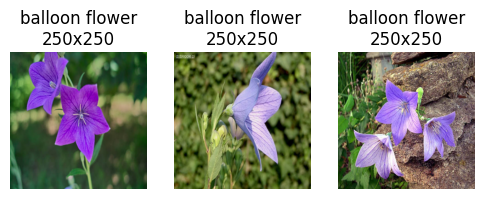

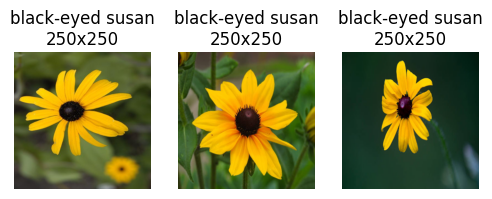

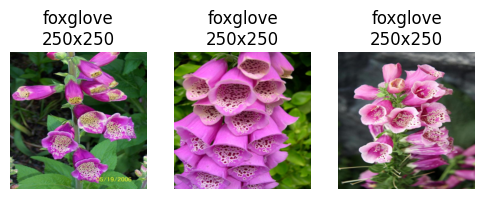

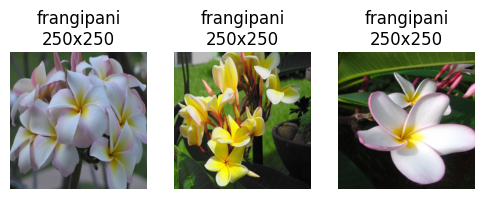

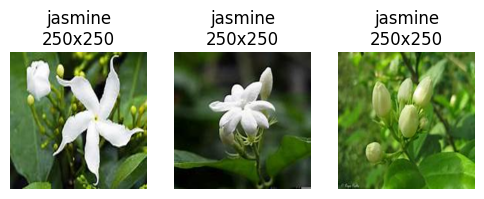

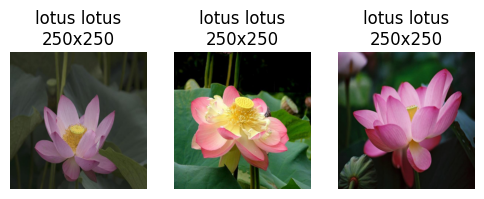

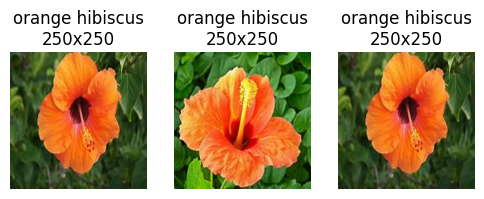

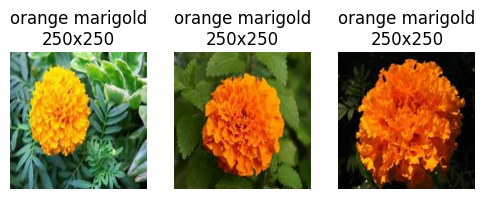

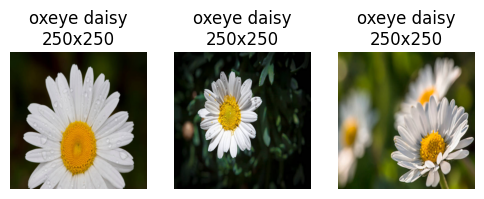

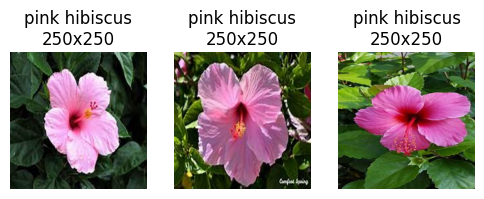

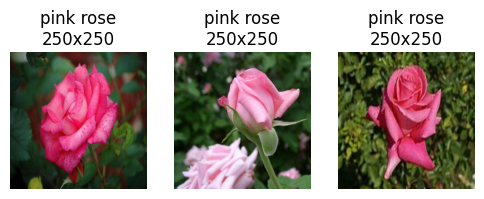

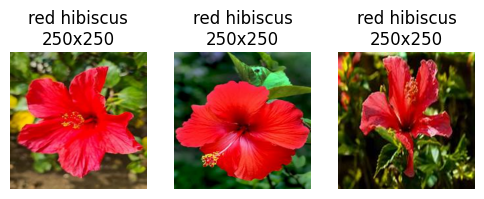

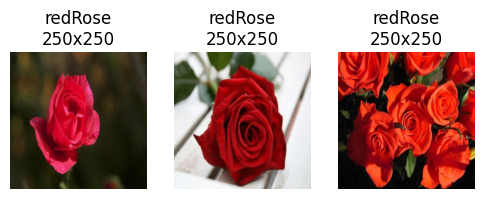

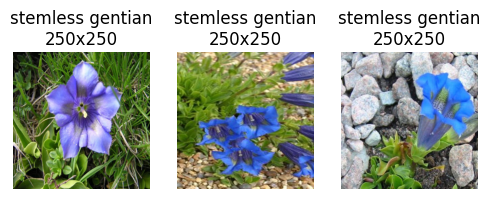

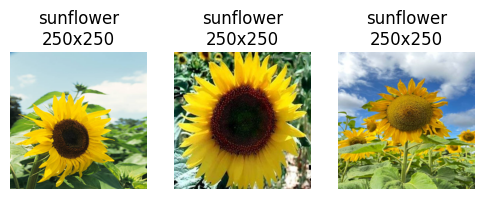

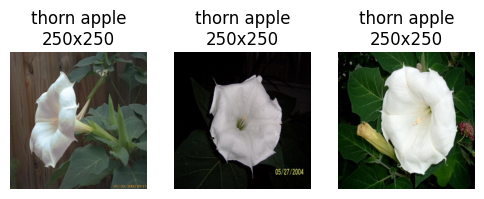

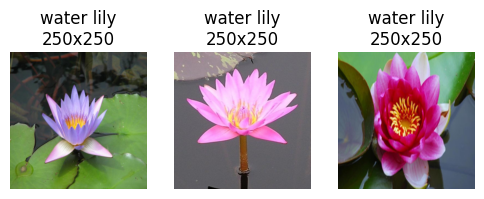

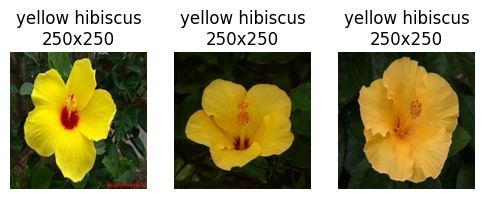

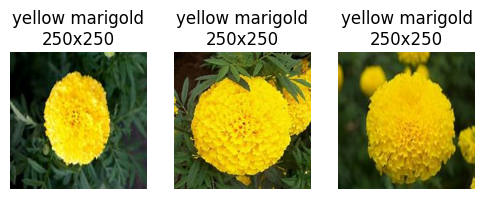

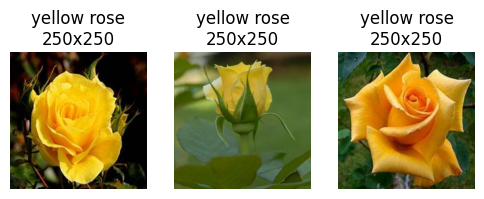

In [9]:
import os
#dataset_path = r"C:\Users\madhu\OneDrive\Desktop\Capstone\Model\newdata\merged"
def explore_images_randomly(dataset_path, num_samples=3, target_size=(250, 250)):
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        sample_images = random.sample(os.listdir(class_dir), num_samples)
        plt.figure(figsize=(6, 6))
        for i, img_name in enumerate(sample_images, start=1):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            img = img.resize(target_size)
            plt.subplot(1, num_samples, i)
            plt.imshow(img)
            plt.title(f'{class_name}\n{target_size[0]}x{target_size[1]}')
            plt.axis('off')
        plt.show()

# Explore images randomly (change num_samples as needed)
explore_images_randomly(dataset_path, num_samples=3)